In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie, GLMakie

In [156]:
t = 1000;
ttr = 1000;
tstep = 0.001;
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

τsE = 3.0; γE = 2.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 1.0; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 10.0;  βY = 1.0;
ythr = 0.5; sEthr = 0.5; kY = 0.01
γY = 20.0;

In [157]:
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0, 0.0, 0.0, 0.0, 0.0]

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, t, Δt = tstep)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

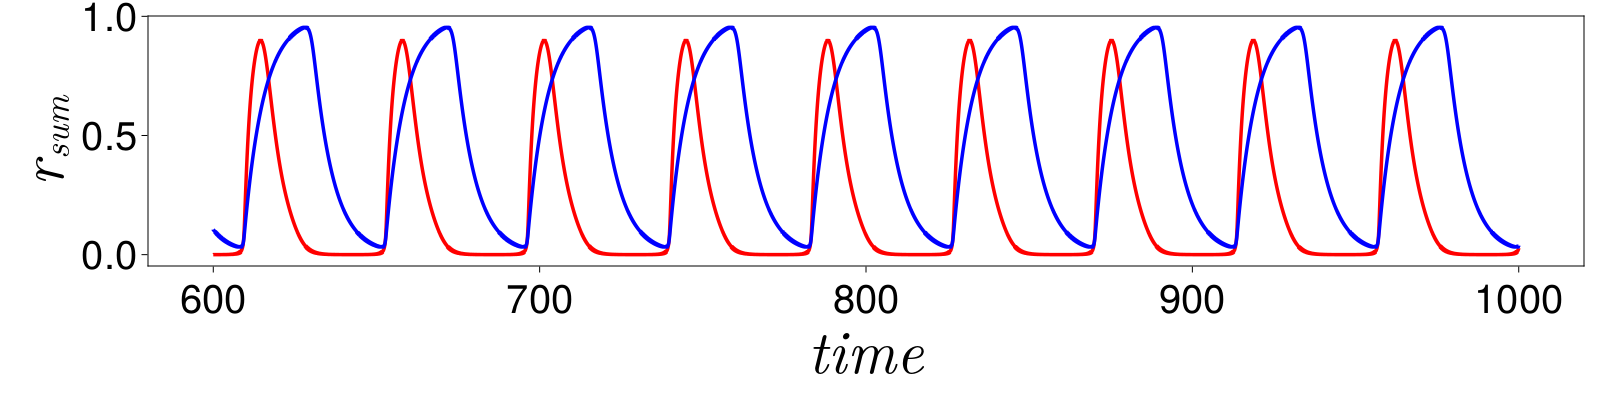

CairoMakie.Screen{IMAGE}


In [159]:
tstart, tend = 600000, 1000000
tickssize = 40
labelsize = 60
lw = 3.5
CairoMakie.activate!()
f= Figure(resolution = (1600, 400))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}",
xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = tickssize, yticklabelsize = tickssize,
xgridvisible = false, ygridvisible = false)
#, title = "point C", titlesize = 40, titlecolor = :deeppink)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = lw, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = lw, color = :blue)

display(f)